# Probability distribution problems

## Binomial distribution

In probability theory and statistics, the binomial distribution is the discrete probability distribution that gives only two possible results in an experiment; for example, when you flip a coin, it can be either head or tails.

In [2]:
from scipy.stats import binom
import numpy as np
import matplotlib.pyplot as plt

In [3]:

# Define all the probability functions related to this distribution

def dbinom(x, size, prob = 0.5):
    """
    Calculates the point estimate of the binomial distribution
    """
    result = binom.pmf(k = x, n = size, p = prob, loc = 0)

    return result

def pbinom(q, size, prob = 0.5):
    """
    Calculates the cumulative of the binomial distribution
    """
    result = binom.cdf(k = q, n = size, p = prob, loc = 0)

    return result

def qbinom(p, size, prob = 0.5):
    """
    Calculates the quantile function from the binomial distribution
    """
    result = binom.ppf(q = p, n = size, p = prob, loc = 0)

    return result

def rbinom(n, size, prob = 0.5):
    """
    Generates random variables from the binomial distribution
    """
    result = binom.rvs(n = size, p = prob, size = n)

    return result

In [4]:
# Binomial(10, 0.2) distribution, where n = 10 is the number of trials and p = 0.2 is the probability of success in a single trial

np.random.seed(42)

print(f"Probability that a Binomial(10, 0.2) takes the value 2: {dbinom(2, size = 10, prob = 0.2)}")
print(f"Probability that a Binomial(10, 0.2) will take a value less than 2: {pbinom(2, size = 10, prob = 0.2)}")
print(f"Which value of a Binomial(10, 0.2) has a cumulative probability of 0.9? {qbinom(0.9, size = 10, prob = 0.2)}")
print(f"Generate 2000 random values from a Binomial(10, 0.2) distribution: {rbinom(2000, size = 10, prob = 0.2)}")

Probability that a Binomial(10, 0.2) takes the value 2: 0.30198988800000004
Probability that a Binomial(10, 0.2) will take a value less than 2: 0.6777995263999999
Which value of a Binomial(10, 0.2) has a cumulative probability of 0.9? 4.0
Generate 2000 random values from a Binomial(10, 0.2) distribution: [1 4 3 ... 0 0 1]


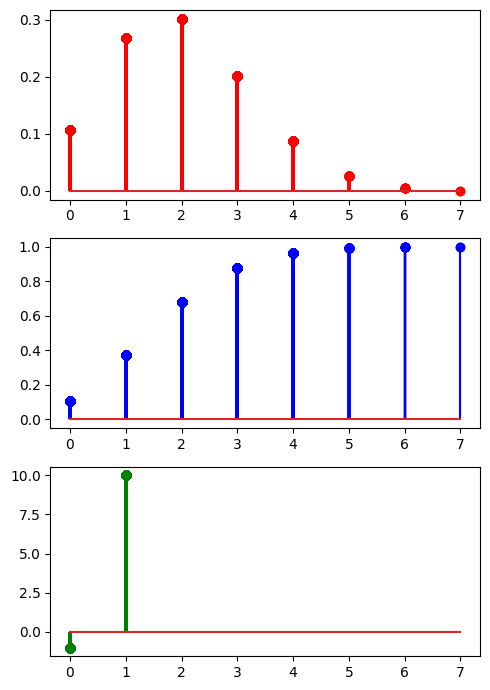

In [5]:
np.random.seed(42)

size = 10
prob = 0.2
data = rbinom(2000, size = 10, prob = 0.2)

pmf = dbinom(data, size = size, prob = prob)
cdf = pbinom(data, size = size, prob = prob)
ppf = qbinom(data, size = size, prob = prob)

fig, axis = plt.subplots(3, 1, figsize = (5, 7))

axis[0].stem(data, pmf, "r-")
axis[1].stem(data, cdf, "b-")
axis[2].stem(data, ppf, "g-")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

## Exercise 1

Write the above functions but for both normal and uniform distributions.

### <u><b>Normal Distribution functions</b></u>

In [6]:
from scipy.stats import norm

In [7]:
#Point Estimate of Normal Dist
def dnorm(x, mean = 0, stdev = 1):
    result = norm.pdf(x, loc=mean, scale=stdev)
    return result

#Cumulative Probability of Normal Dist
def pnorm(q, mean = 0, stdev = 1):
    result = norm.cdf(q, loc=mean, scale=stdev)
    return result

#Quantile func, inverse Cumulative, of Normal Dist
def qnorm(p, mean = 0, stdev = 1):
    result = norm.ppf(p, loc=mean, scale=stdev)
    return result

#Random Values for normal Dist
def rnorm(n, mean = 0, stdev = 1):
    result = norm.rvs(loc=mean, scale=stdev, size=n)
    return result


In [8]:
# Normal Distribution with mean = 0 and standard deviation = 1 - Normal(0, 1) distribution

np.random.seed(42)

print(f" Normal(0, 1) distribution - Normal Distribution with mean = 0 and standard deviation = 1")
print("")
print(f"Probability density x=2: {dnorm(2)}")
print(f"Cumulative Probability up to x=2: {pnorm(2)}")
print(f"Value at 90th percentile: {qnorm(0.9)}")
print(f"Generate 2000 random values: {rnorm(2000)}")

 Normal(0, 1) distribution - Normal Distribution with mean = 0 and standard deviation = 1

Probability density x=2: 0.05399096651318806
Cumulative Probability up to x=2: 0.9772498680518208
Value at 90th percentile: 1.2815515655446004
Generate 2000 random values: [ 0.49671415 -0.1382643   0.64768854 ... -0.88187465 -0.16306696
 -0.74490264]


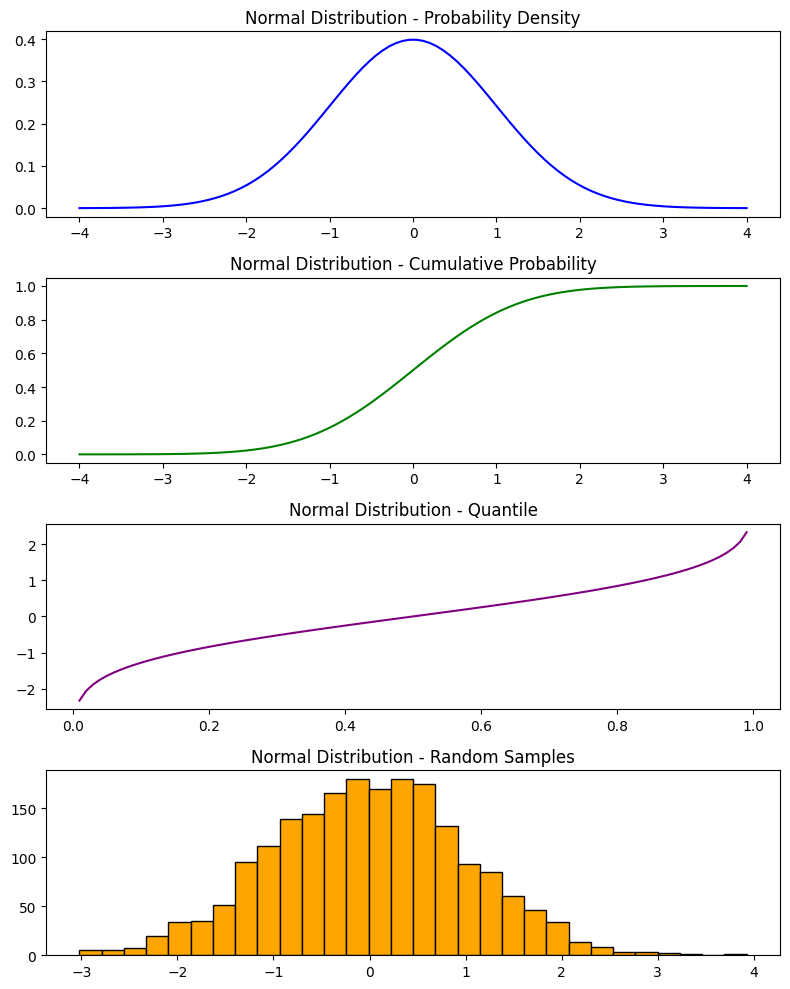

In [9]:
#Generate x values
x = np.linspace(-4, 4, 100)

#PDF - CDF - Quantile
pdf = dnorm(x)
cdf = pnorm(x)
quantiles = qnorm(np.linspace(0.01, 0.99, 100))

#Random samples
samples = rnorm(2000)

# Plot
fig, axis = plt.subplots(4, 1, figsize=(8, 10))

axis[0].plot(x, pdf, color="blue")
axis[0].set_title("Normal Distribution - Probability Density")

axis[1].plot(x, cdf, color="green")
axis[1].set_title("Normal Distribution - Cumulative Probability")

axis[2].plot(np.linspace(0.01, 0.99, 100), quantiles, color="purple")
axis[2].set_title("Normal Distribution - Quantile")

axis[3].hist(samples, bins=30, color="orange", edgecolor="black")
axis[3].set_title("Normal Distribution - Random Samples")

plt.tight_layout()
plt.show()

______________________
### <u><b>Uniform Distribution functions</b></u>

In [10]:
from scipy.stats import uniform

In [11]:
#Point estimate of the uniform dist
def dunif(x, min_val=0, max_val=1):
    result = uniform.pdf(x, loc=min_val, scale=max_val - min_val)
    return result

#Cumulative probability of the uniform dist
def punif(q, min_val=0, max_val=1):
    result = uniform.cdf(q, loc=min_val, scale=max_val - min_val)
    return result

#Quantile function of the uniform dist
def qunif(p, min_val=0, max_val=1):
    result = uniform.ppf(p, loc=min_val, scale=max_val - min_val)
    return result

#Generate random values from the uniform dist
def runif(n, min_val=0, max_val=1):
    result = uniform.rvs(loc=min_val, scale=max_val - min_val, size=n)
    return result

In [12]:
# Uniform Distribution with range [0, 1]

np.random.seed(42)

print(f" Uniform(0, 1) distribution - Uniform Distribution between 0 and 1")
print("")
print(f"Probability density x=0.5: {dunif(0.5)}")
print(f"Cumulative Probability up to x=0.5: {punif(0.5)}")
print(f"Value at 90th percentile: {qunif(0.9)}")
print(f"Generate 2000 random values: {runif(2000)}")

 Uniform(0, 1) distribution - Uniform Distribution between 0 and 1

Probability density x=0.5: 1.0
Cumulative Probability up to x=0.5: 0.5
Value at 90th percentile: 0.9
Generate 2000 random values: [0.37454012 0.95071431 0.73199394 ... 0.06895802 0.05705472 0.28218707]


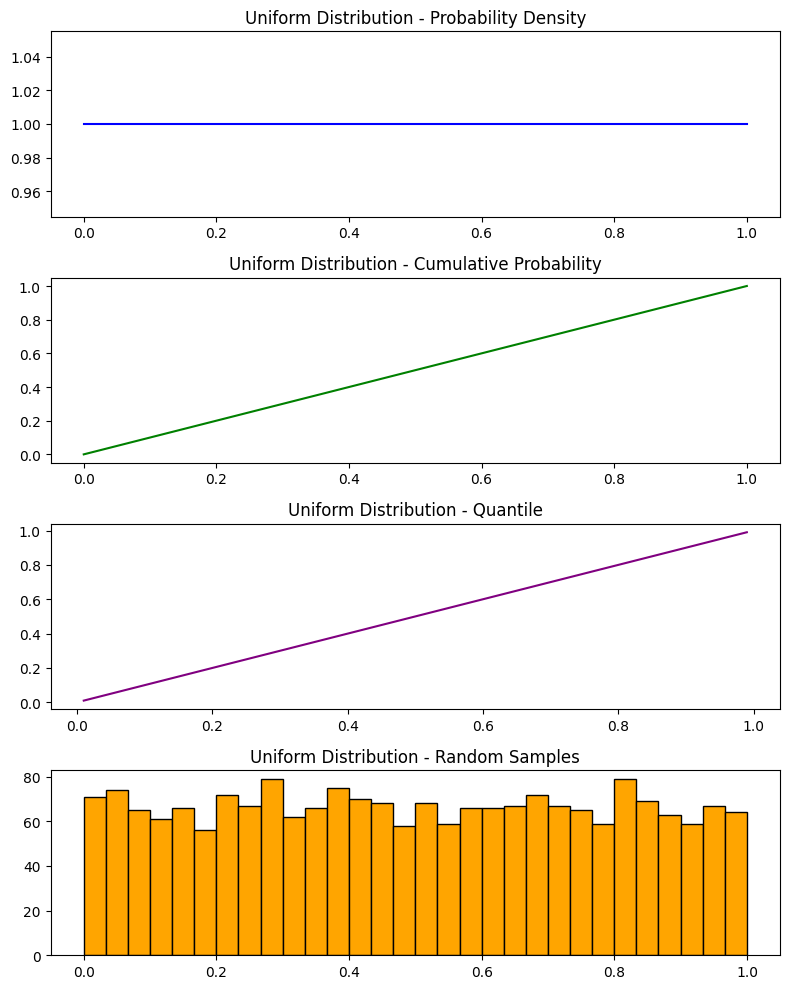

In [13]:
#Generate x values
x = np.linspace(0, 1, 100)

#PDF - CDF - Quantile
pdf = dunif(x)
cdf = punif(x)
quantiles = qunif(np.linspace(0.01, 0.99, 100))

#Random samples
samples = runif(2000)

# Plot
fig, axis = plt.subplots(4, 1, figsize=(8, 10))

axis[0].plot(x, pdf, color="blue")
axis[0].set_title("Uniform Distribution - Probability Density")

axis[1].plot(x, cdf, color="green")
axis[1].set_title("Uniform Distribution - Cumulative Probability")

axis[2].plot(np.linspace(0.01, 0.99, 100), quantiles, color="purple")
axis[2].set_title("Uniform Distribution - Quantile")

axis[3].hist(samples, bins=30, color="orange", edgecolor="black")
axis[3].set_title("Uniform Distribution - Random Samples")

plt.tight_layout()
plt.show()